# Coercing Data

### Introduction

In this lab, we'll work on coercing data from a dataframe.

### Exploring our data

We can start by loading our data from the related `csv` file.

In [105]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/nyc_hs_sat.csv')
columns = ['reading_avg', 'math_avg', 'writing_score']
df[columns] = df[columns].astype('object')

> Above, we changed some of the columns to be an object so that our data is not so clean right out of the gate.  But let's pretend that didn't happen.

Ok, now let's begin to explore our data.

1. First, view the list of columns in our dataframe.

In [67]:
df_columns = df.columns
df_columns
# Index(['dbn', 'name', 'num_test_takers', 'reading_avg', 'math_avg',
#        'writing_score', 'boro', 'total_students', 'graduation_rate',
#        'attendance_rate', 'college_career_rate'],
#       dtype='object')

Index(['dbn', 'name', 'num_test_takers', 'reading_avg', 'math_avg',
       'writing_score', 'boro', 'total_students', 'graduation_rate',
       'attendance_rate', 'college_career_rate'],
      dtype='object')

Ok, let's start by selecting `math_avg` as our target.  Select this column and assign it to the variable `y`.

In [68]:
y = df.math_avg

In [69]:
y[:3]

# 0    404
# 1    423
# 2    402

0    404
1    423
2    402
Name: math_avg, dtype: object

Let's choose `boro`, `total_students`, `graduation_rate`, and `attendance_rate` as features in our model.  Select those columns and assign them to the variable `X`.

In [72]:
feature_cols = ['boro', 'total_students', 'graduation_rate', 'attendance_rate']
X = df[feature_cols]

In [73]:
X[:2]

# 	boro	total_students	graduation_rate	attendance_rate
# 0	M	171	0.66	0.87
# 1	M	465	0.90	0.93

,boro,total_students,graduation_rate,attendance_rate
0,M,171,0.66,0.87
1,M,465,0.90,0.93


2. Now, let's see the columns and the respective datatype the features in our `X` dataframe.

In [74]:
X_types = X.dtypes
X_types

# boro                object
# total_students       int64
# graduation_rate    float64
# attendance_rate    float64
# dtype: object

boro                object
total_students       int64
graduation_rate    float64
attendance_rate    float64
dtype: object

Now if our datatypes are already a number, we're in pretty good shape.  It's where our datatypes are *objects* that we should do some cleaning up.

Let's select the `boro` column from `X` and assign it to the variable `boro_series`.

In [75]:
boro_series = X.boro
boro_series[:3]

# 0    M
# 1    M
# 2    M
# Name: boro, dtype: object

0    M
1    M
2    M
Name: boro, dtype: object

### Changing the boro column

To start with, let's use a pandas method to view all of the different values in the series and the corresponding counts of the values.

In [76]:
val_counts = boro_series.value_counts()
val_counts

# K    96
# X    80
# M    77
# Q    60
# R    10
# Name: boro, dtype: int64

K    96
X    80
M    77
Q    60
R    10
Name: boro, dtype: int64

So we can see that there are five different values, just as there are five boroughs.  A little research would reveal that `M -> Manhattan`, `K -> Brooklyn`, `X -> Bronx`, `Q -Queens`, `R -> Staten Island`.  This is categorical data.

Start by changing the datatype of the `boro_series` series from `object` to `category` and assign it to `boro_ser_cat`.

In [77]:
boro_ser_cat = boro_series.astype('category')

In [78]:
boro_ser_cat.dtype
# CategoricalDtype(categories=['K', 'M', 'Q', 'R', 'X'], ordered=False)

CategoricalDtype(categories=['K', 'M', 'Q', 'R', 'X'], ordered=False)

Now let's select the corresponding codes from the borough series, and assign it to `boro_series_codes`.

In [80]:
boro_series_codes = boro_ser_cat.cat.codes
boro_series_codes.value_counts()

# 0    96
# 4    80
# 1    77
# 2    60
# 3    10
# dtype: int64

0    96
4    80
1    77
2    60
3    10
dtype: int64

Ok, now let's replace the `boro` column in the `X` dataframe with the values in `boro_series_codes`.

In [81]:
X = X.assign(boro = boro_series_codes)

In [82]:
X.dtypes

# boro                  int8
# total_students       int64
# graduation_rate    float64
# attendance_rate    float64
# dtype: object

boro                  int8
total_students       int64
graduation_rate    float64
attendance_rate    float64
dtype: object

Now we can see that all of our features are represented as numbers.

In [83]:
y.dtype

dtype('O')

However, our `y` values are still a string.  We'll do this one for you.

In [84]:
y = y.astype('float64')

In [85]:
y.dtype

dtype('float64')

### Training a model

Now that all of our data is properly formatted, let's train a model.

> Our target values can be any number in a range, so we use the `DecisionTreeRegressor`.

In [87]:
from sklearn.tree import DecisionTreeRegressor

Now create a new `DecisionTreeRegressor` model and assign it to the variable `model`.

In [88]:
model = DecisionTreeRegressor()

Finally, fit the model with the features and target values.

In [89]:
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

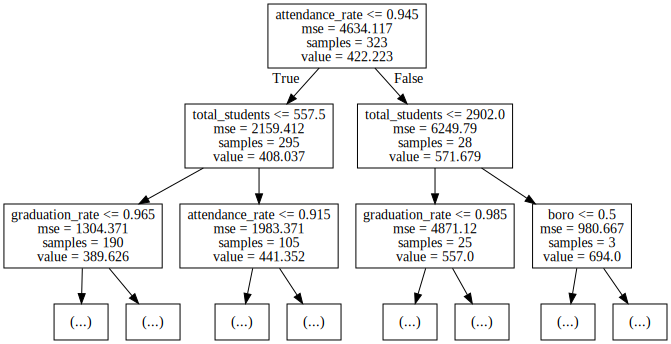

In [90]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 

Source(tree.export_graphviz(model, out_file = None, feature_names=X.columns, max_depth = 2))

In [91]:
X[:2]

,boro,total_students,graduation_rate,attendance_rate
0,1,171,0.66,0.87
1,1,465,0.90,0.93


In [103]:
schools = [
    [3, 200, 0.66,0.70],
    [2, 300, 0.90,0.95]
]

In [104]:
model.predict(schools)
# array([315., 421.])

array([315., 421.])

### Summary

In this lab, we practiced using pandas to select specific columns, and then using the category datatype to perform feature engineering.  Finally, we trained a machine learning model with sklearn.  Great job :)

### Answers

In [ ]:
df_columns = df.columns
df_columns

In [ ]:
y = df.math_avg

In [ ]:
boro_ser_cat = boro_series.astype('category')

In [ ]:
X = X.assign(boro = boro_series_codes)

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(X, y)

In [ ]:
model.predict(schools)